In [2]:
import numpy as np,matplotlib.pyplot as plt,pandas as pd
from scipy.io import loadmat
import random
%matplotlib inline

In [3]:
data_set=loadmat('clustering_data2.mat')

In [4]:
X=data_set['X']

In [5]:
X

array([[ 1.84207953,  4.6075716 ],
       [ 5.65858312,  4.79996405],
       [ 6.35257892,  3.2908545 ],
       [ 2.90401653,  4.61220411],
       [ 3.23197916,  4.93989405],
       [ 1.24792268,  4.93267846],
       [ 1.97619886,  4.43489674],
       [ 2.23454135,  5.05547168],
       [ 2.98340757,  4.84046406],
       [ 2.97970391,  4.80671081],
       [ 2.11496411,  5.37373587],
       [ 2.12169543,  5.20854212],
       [ 1.5143529 ,  4.77003303],
       [ 2.16979227,  5.27435354],
       [ 0.41852373,  4.88312522],
       [ 2.47053695,  4.80418944],
       [ 4.06069132,  4.99503862],
       [ 3.00708934,  4.67897758],
       [ 0.66632346,  4.87187949],
       [ 3.1621865 ,  4.83658301],
       [ 0.51155258,  4.91052923],
       [ 3.1342801 ,  4.96178114],
       [ 2.04974595,  5.6241395 ],
       [ 0.66582785,  5.24399257],
       [ 1.01732013,  4.84473647],
       [ 2.17893568,  5.29758701],
       [ 2.85962615,  5.26041997],
       [ 1.30882588,  5.30158701],
       [ 0.99253246,

In [6]:
x1=X[:,0]
x1

array([ 1.84207953,  5.65858312,  6.35257892,  2.90401653,  3.23197916,
        1.24792268,  1.97619886,  2.23454135,  2.98340757,  2.97970391,
        2.11496411,  2.12169543,  1.5143529 ,  2.16979227,  0.41852373,
        2.47053695,  4.06069132,  3.00708934,  0.66632346,  3.1621865 ,
        0.51155258,  3.1342801 ,  2.04974595,  0.66582785,  1.01732013,
        2.17893568,  2.85962615,  1.30882588,  0.99253246,  1.40372638,
        2.66046572,  2.79995882,  2.06995345,  3.29765181,  1.8929766 ,
        2.55983064,  1.15354031,  2.25150754,  2.20960296,  1.59141937,
        1.67838038,  2.59148642,  2.80996442,  0.95311627,  1.51775276,
        3.23114248,  2.54180011,  3.81422865,  1.68495829,  2.17777173,
        1.8173328 ,  1.85776553,  3.03084301,  2.92658295,  3.43493543,
        3.20367116,  0.10511804,  1.40597916,  2.24185052,  1.36678395,
        1.70725482,  1.91909566,  1.60156731,  0.37963437,  2.02134502,
        1.12036737,  2.26901428, -0.24512713,  2.12857843,  1.84

In [7]:
x2=X[:,1]

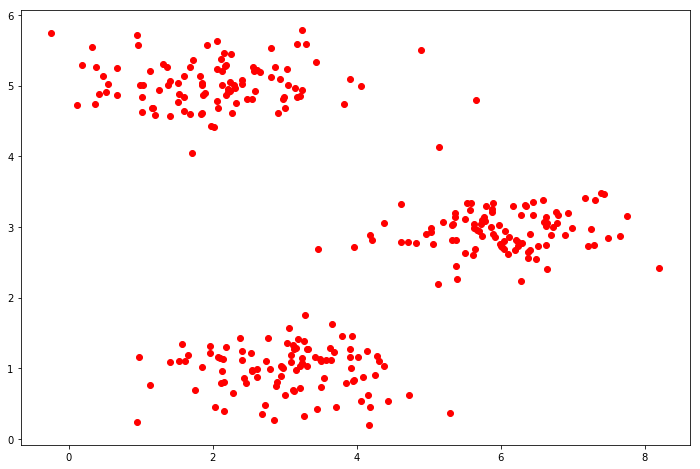

In [8]:
fig,ax=plt.subplots(figsize=(12,8))
ax.scatter(x1,x2,c='r')

In [9]:
#3 clusters so k=3 , 3 mean clustering

In [10]:
initial_centroids=np.array([[3,3],[6,2],[8,5]])

In [11]:
def get_dist(pointA,pointB):
    return ((pointA[0]-pointB[0])**2)+((pointA[1]-pointB[1])**2)

In [12]:
X

array([[ 1.84207953,  4.6075716 ],
       [ 5.65858312,  4.79996405],
       [ 6.35257892,  3.2908545 ],
       [ 2.90401653,  4.61220411],
       [ 3.23197916,  4.93989405],
       [ 1.24792268,  4.93267846],
       [ 1.97619886,  4.43489674],
       [ 2.23454135,  5.05547168],
       [ 2.98340757,  4.84046406],
       [ 2.97970391,  4.80671081],
       [ 2.11496411,  5.37373587],
       [ 2.12169543,  5.20854212],
       [ 1.5143529 ,  4.77003303],
       [ 2.16979227,  5.27435354],
       [ 0.41852373,  4.88312522],
       [ 2.47053695,  4.80418944],
       [ 4.06069132,  4.99503862],
       [ 3.00708934,  4.67897758],
       [ 0.66632346,  4.87187949],
       [ 3.1621865 ,  4.83658301],
       [ 0.51155258,  4.91052923],
       [ 3.1342801 ,  4.96178114],
       [ 2.04974595,  5.6241395 ],
       [ 0.66582785,  5.24399257],
       [ 1.01732013,  4.84473647],
       [ 2.17893568,  5.29758701],
       [ 2.85962615,  5.26041997],
       [ 1.30882588,  5.30158701],
       [ 0.99253246,

In [13]:
def new_centroid_generation(X_set,clusters,centroid):
    new_centroids=np.array(np.zeros((centroid.shape)))
    for i in range(len(clusters)):
        new_centroids[int(clusters[i])][0]+=X_set[i][0]
        new_centroids[int(clusters[i])][1]+=X_set[i][1]
    for i in range(3):
        new_centroids[i][0]=new_centroids[i][0]/((clusters==i).sum())
        new_centroids[i][1]=new_centroids[i][1]/((clusters==i).sum())
    return new_centroids
            

In [14]:
def get_clusters(X_set,centroid):
    dist_count=X_set.shape[0]
    a=np.array(np.zeros((dist_count)))
    temp=np.array(np.zeros(centroid.shape))
    cluster_size=centroid.shape[0]
    dist_arr=np.array(np.zeros((cluster_size)))
    for k in range(100):
    #while not (np.array_equal(temp,centroid)):
        for i in range(dist_count):
            for j in range(cluster_size):
                dist_arr[j]=get_dist(X[i],centroid[j])
            a[i]=np.argmin(dist_arr)
            temp=new_centroid_generation(X,a,centroid)
        if np.array_equal(temp,centroid):
            print(k)
            break
        centroid=temp
        
    print(centroid)
    return a,centroid

In [15]:
clusters,c=get_clusters(X,initial_centroids)

C:\Anaconda\envs\rstudio\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
C:\Anaconda\envs\rstudio\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


6
[[1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]]


In [16]:
clusters

array([0., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

In [17]:
c


array([[1.95399466, 5.02557006],
       [3.04367119, 1.01541041],
       [6.03366736, 3.00052511]])

In [18]:
(clusters==0).sum()

98

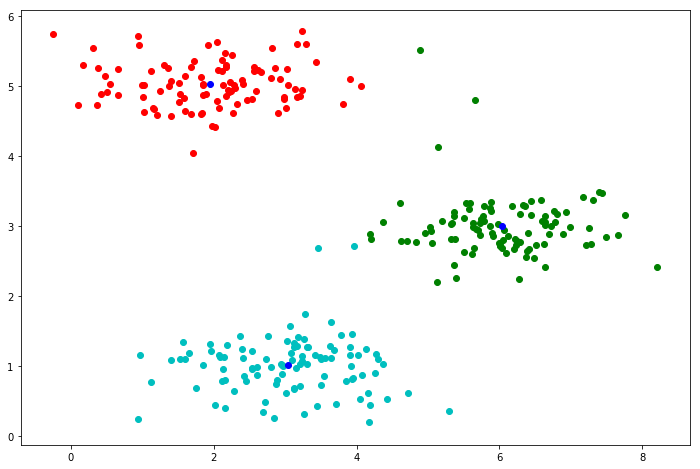

In [19]:
fig,ax=plt.subplots(figsize=(12,8))
li=['r','c','g']
for i in range(len(clusters)):
    ax.scatter(x1[i],x2[i],c=li[int(clusters[i])])
#ax.scatter(x1,x2,c='r')
centroid_set_x=c[:,0]
centroid_set_y=c[:,1]
ax.scatter(centroid_set_x,centroid_set_y,c='b')

In [20]:
#operation for 6 clusters
#----------------------------------------------------------------
#----------------------------------------------------------------
#----------------------------------------------------------------

In [36]:
def generate_initial_centroids(x1,x2,n):
    points=np.zeros((n,2))
    for i in range(n):
        points[i]=[random.randint(int(np.amin(x1)),int(np.amax(x1))),random.randint(int(np.amin(x2)),int(np.amax(x2)))]
    return points

In [64]:
initial_cent=generate_initial_centroids(x1,x2,6)

In [65]:
initial_cent

array([[0., 1.],
       [5., 4.],
       [8., 4.],
       [1., 0.],
       [0., 1.],
       [1., 1.]])

In [66]:
clusters,c=get_clusters(X,initial_cent)
clusters

C:\Anaconda\envs\rstudio\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
C:\Anaconda\envs\rstudio\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


[[ 1.95399466  5.02557006]
 [ 3.08486911  0.97484365]
 [ 6.08866645  3.00297238]
 [ 0.          0.        ]
 [ 3.04408412  2.17774357]
 [27.11390225 17.54816164]]


array([0., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 4., 1., 1., 1., 1., 5., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 5., 1., 1., 1., 1., 1., 1., 1., 1., 1., 4., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 4., 1., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

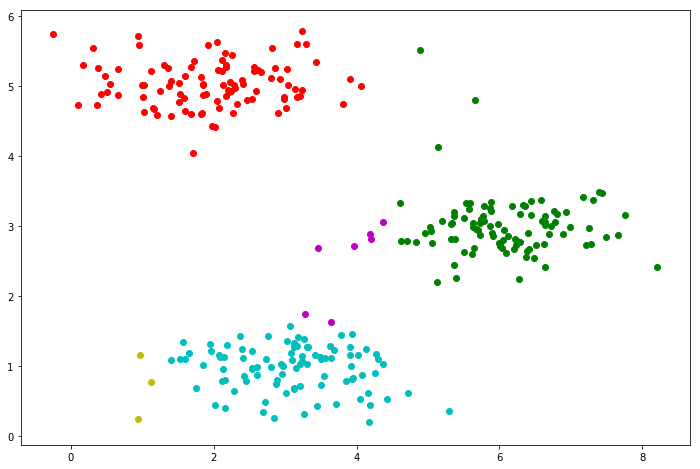

In [67]:
fig,ax=plt.subplots(figsize=(12,8))
li=['r','c','g','b','y','m']
for i in range(len(clusters)):
    ax.scatter(x1[i],x2[i],c=li[int(clusters[i])])
#ax.scatter(x1,x2,c='r')
centroid_set_x=c[:,0]
centroid_set_y=c[:,1]
#ax.scatter(centroid_set_x,centroid_set_y,c='b')